In [106]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# plotly
import plotly
import plotly.plotly as py
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go

# word cloud library
from wordcloud import WordCloud

# seaborn
import seaborn as sns

# matplotlib
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline

sns.set()

In [133]:
pd.__version__

'0.22.0'

In [135]:
np.__version__

'1.13.3'

In [136]:
sns.__version__

'0.9.0'

In [140]:
plotly.__version__

'3.1.1'

In [141]:
matplotlib.__version__

'2.2.2'

In [6]:
df = pd.read_csv('datasets/locations.csv')
df.head()

,Brand,Store Number,Store Name,Ownership Type,Street Address,City,State/Province,Country,Postcode,Phone Number,Timezone,Longitude,Latitude
0,Starbucks,47370-257954,"Meritxell, 96",Licensed,"Av. Meritxell, 96",Andorra la Vella,7,AD,AD500,376818720,GMT+1:00 Europe/Andorra,1.53,42.51
1,Starbucks,22331-212325,Ajman Drive Thru,Licensed,"1 Street 69, Al Jarf",Ajman,AJ,AE,NaN,NaN,GMT+04:00 Asia/Dubai,55.47,25.42
2,Starbucks,47089-256771,Dana Mall,Licensed,Sheikh Khalifa Bin Zayed St.,Ajman,AJ,AE,NaN,NaN,GMT+04:00 Asia/Dubai,55.47,25.39
3,Starbucks,22126-218024,Twofour 54,Licensed,Al Salam Street,Abu Dhabi,AZ,AE,NaN,NaN,GMT+04:00 Asia/Dubai,54.38,24.48
4,Starbucks,17127-178586,Al Ain Tower,Licensed,"Khaldiya Area, Abu Dhabi Island",Abu Dhabi,AZ,AE,NaN,NaN,GMT+04:00 Asia/Dubai,54.54,24.51


In [7]:
def update_column(column):
    return column.replace(' ', '_').lower()

In [285]:
starbucks = df.copy()

In [286]:
starbucks.columns = starbucks.columns.map(update_column)

In [287]:
starbucks.head()

,brand,store_number,store_name,ownership_type,street_address,city,state/province,country,postcode,phone_number,timezone,longitude,latitude
0,Starbucks,47370-257954,"Meritxell, 96",Licensed,"Av. Meritxell, 96",Andorra la Vella,7,AD,AD500,376818720,GMT+1:00 Europe/Andorra,1.53,42.51
1,Starbucks,22331-212325,Ajman Drive Thru,Licensed,"1 Street 69, Al Jarf",Ajman,AJ,AE,NaN,NaN,GMT+04:00 Asia/Dubai,55.47,25.42
2,Starbucks,47089-256771,Dana Mall,Licensed,Sheikh Khalifa Bin Zayed St.,Ajman,AJ,AE,NaN,NaN,GMT+04:00 Asia/Dubai,55.47,25.39
3,Starbucks,22126-218024,Twofour 54,Licensed,Al Salam Street,Abu Dhabi,AZ,AE,NaN,NaN,GMT+04:00 Asia/Dubai,54.38,24.48
4,Starbucks,17127-178586,Al Ain Tower,Licensed,"Khaldiya Area, Abu Dhabi Island",Abu Dhabi,AZ,AE,NaN,NaN,GMT+04:00 Asia/Dubai,54.54,24.51


In [288]:
starbucks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25600 entries, 0 to 25599
Data columns (total 13 columns):
brand             25600 non-null object
store_number      25600 non-null object
store_name        25600 non-null object
ownership_type    25600 non-null object
street_address    25598 non-null object
city              25585 non-null object
state/province    25600 non-null object
country           25600 non-null object
postcode          24078 non-null object
phone_number      18739 non-null object
timezone          25600 non-null object
longitude         25599 non-null float64
latitude          25599 non-null float64
dtypes: float64(2), object(11)
memory usage: 2.5+ MB


`longitude` ve `latitude` değerleri olmayan Starbucks'ları dikkate almayalım. Bu veri kümemizde sadece bir yerin 2 değerinin olmadığını yukarıda görüyoruz.

In [289]:
starbucks.dropna(axis=0, subset=['longitude', 'latitude'], inplace=True)

In [290]:
starbucks.dropna(axis=1, inplace=True)

In [291]:
starbucks.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25599 entries, 0 to 25599
Data columns (total 9 columns):
brand             25599 non-null object
store_number      25599 non-null object
store_name        25599 non-null object
ownership_type    25599 non-null object
state/province    25599 non-null object
country           25599 non-null object
timezone          25599 non-null object
longitude         25599 non-null float64
latitude          25599 non-null float64
dtypes: float64(2), object(7)
memory usage: 2.0+ MB


In [292]:
starbucks.ownership_type.unique()

array(['Licensed', 'Joint Venture', 'Company Owned', 'Franchise'], dtype=object)

In [293]:
starbucks.country.unique()

array(['AD', 'AE', 'AR', 'AT', 'AU', 'AW', 'AZ', 'BE', 'BG', 'BH', 'BN',
       'BO', 'BR', 'BS', 'CA', 'CH', 'CL', 'CN', 'CO', 'CR', 'CW', 'CY',
       'CZ', 'DE', 'DK', 'EG', 'ES', 'FI', 'FR', 'GB', 'GR', 'GT', 'HU',
       'ID', 'IE', 'IN', 'JO', 'JP', 'KH', 'KR', 'KW', 'KZ', 'LB', 'LU',
       'MA', 'MC', 'MX', 'MY', 'NL', 'NO', 'NZ', 'OM', 'PA', 'PE', 'PH',
       'PL', 'PR', 'PT', 'QA', 'RO', 'RU', 'SA', 'SE', 'SG', 'SK', 'SV',
       'TH', 'TR', 'TT', 'TW', 'US', 'VN', 'ZA'], dtype=object)

In [294]:
country_indices, country_labels = starbucks.country.factorize()
country_labels

Index(['AD', 'AE', 'AR', 'AT', 'AU', 'AW', 'AZ', 'BE', 'BG', 'BH', 'BN', 'BO',
       'BR', 'BS', 'CA', 'CH', 'CL', 'CN', 'CO', 'CR', 'CW', 'CY', 'CZ', 'DE',
       'DK', 'EG', 'ES', 'FI', 'FR', 'GB', 'GR', 'GT', 'HU', 'ID', 'IE', 'IN',
       'JO', 'JP', 'KH', 'KR', 'KW', 'KZ', 'LB', 'LU', 'MA', 'MC', 'MX', 'MY',
       'NL', 'NO', 'NZ', 'OM', 'PA', 'PE', 'PH', 'PL', 'PR', 'PT', 'QA', 'RO',
       'RU', 'SA', 'SE', 'SG', 'SK', 'SV', 'TH', 'TR', 'TT', 'TW', 'US', 'VN',
       'ZA'],
      dtype='object')

In [295]:
country_indices

array([ 0,  1,  1, ..., 72, 72, 72])

In [296]:
starbucks["country_indice"] = country_indices

Öncelikle daha anlaşılır olması açıcısından ülke kısaltmalarının tam isimlerini de veri kümemize ekleyelim.

In [297]:
countries = pd.read_csv('datasets/countries.csv', names=['country_name', 'code'])
countries.head()

,country_name,code
0,Name,Code
1,Afghanistan,AF
2,Åland Islands,AX
3,Albania,AL
4,Algeria,DZ


In [298]:
starbucks = starbucks.merge(countries, left_on='country', right_on='code')
starbucks.drop('code', axis=1, inplace=True)
starbucks.head()

,brand,store_number,store_name,ownership_type,state/province,country,timezone,longitude,latitude,country_indice,country_name
0,Starbucks,47370-257954,"Meritxell, 96",Licensed,7,AD,GMT+1:00 Europe/Andorra,1.53,42.51,0,Andorra
1,Starbucks,22331-212325,Ajman Drive Thru,Licensed,AJ,AE,GMT+04:00 Asia/Dubai,55.47,25.42,1,United Arab Emirates
2,Starbucks,47089-256771,Dana Mall,Licensed,AJ,AE,GMT+04:00 Asia/Dubai,55.47,25.39,1,United Arab Emirates
3,Starbucks,22126-218024,Twofour 54,Licensed,AZ,AE,GMT+04:00 Asia/Dubai,54.38,24.48,1,United Arab Emirates
4,Starbucks,17127-178586,Al Ain Tower,Licensed,AZ,AE,GMT+04:00 Asia/Dubai,54.54,24.51,1,United Arab Emirates


İncelememize ülkelerdeki Starbucks dağılımlarını görselleştirmekle başlayalım. Öncelikle `matplotlib` kullanarak bunu gerçekleştirelim.

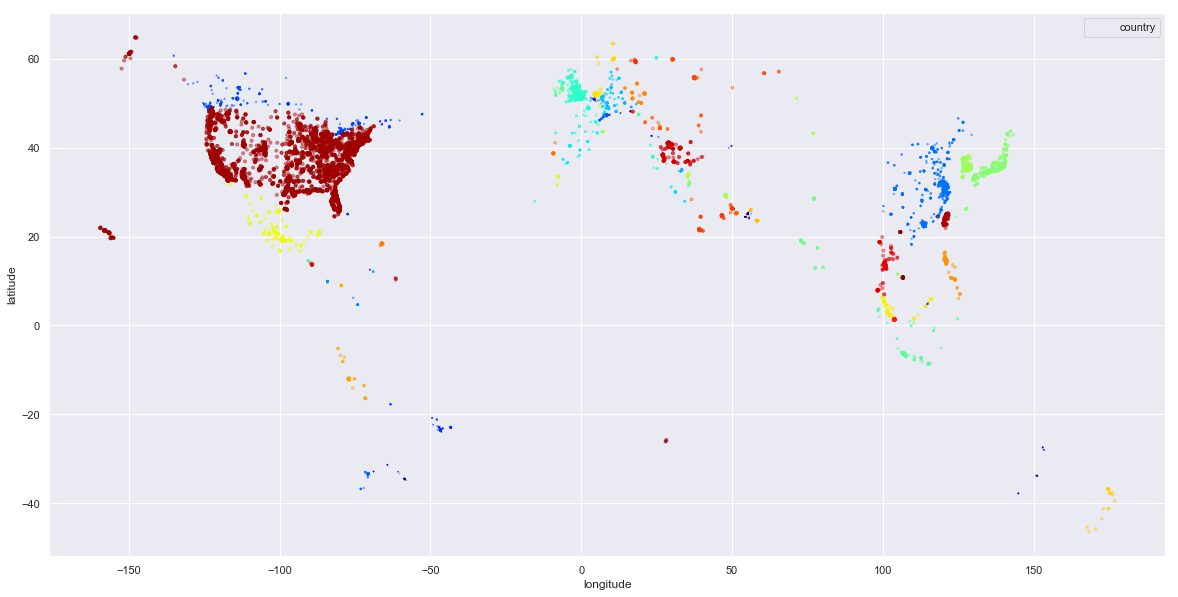

In [300]:
starbucks.plot(kind="scatter", x="longitude", y="latitude", 
               alpha=0.4, 
               figsize=(20,10), 
               c=starbucks.country_indice,
               s=starbucks["country_indice"] * 10 / len(country_labels), label="country",
               cmap=plt.get_cmap("jet"), 
               colorbar=False
)
plt.legend();

Bir de aynı haritayı _seaborn_ ile oluşturmayı deneyelim.

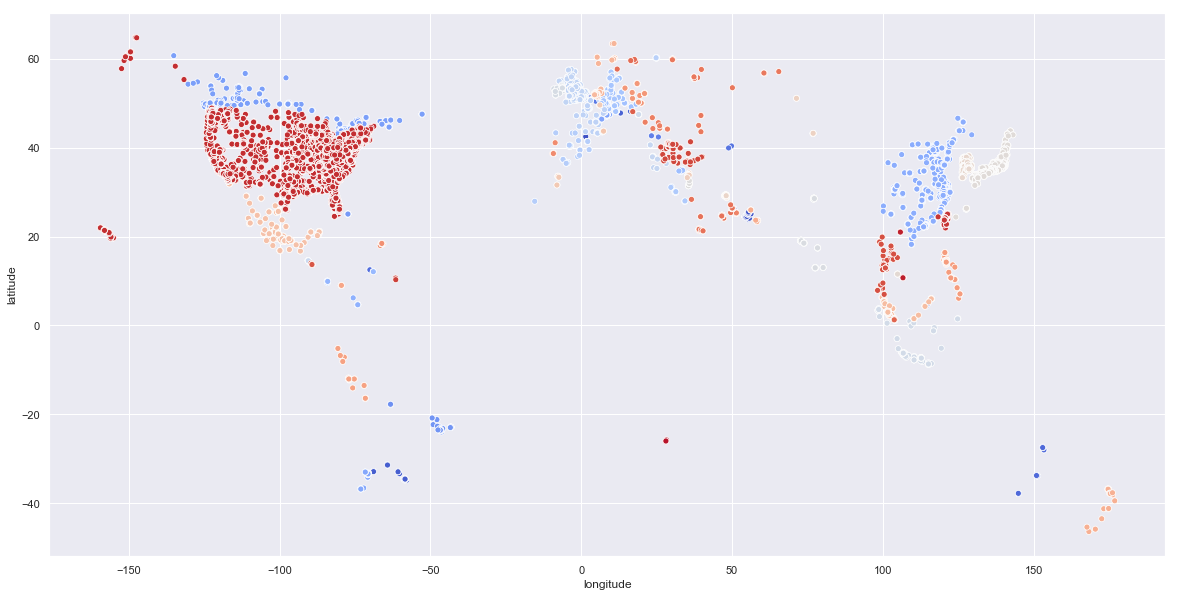

In [301]:
plt.figure(figsize=(20,10))

sns.scatterplot(x="longitude", y="latitude", data=starbucks, 
                hue="country", 
                legend=False, 
                palette=sns.color_palette('coolwarm', n_colors=len(country_labels)));

Sırada _ployly_ üzerinden aynı aracı interaktif olarak görselleştirmeye çalışalım:

In [302]:
co_lat_long = pd.Series(starbucks.country_name + " <br> "+starbucks.latitude.astype(str) + ' : ' + starbucks.longitude.astype(str))

In [ ]:
trace = go.Scattergeo(
    lat=starbucks.latitude, 
    lon=starbucks.longitude, 
    mode='markers',
    hoverinfo = 'text', 
    text=co_lat_long,
    marker = dict( 
        size=2, 
        color= starbucks.country_indice,
        colorscale='jet',
        autocolorscale = False,
    )
)

data = [trace]

layout = dict(
    title = 'Starbucks Locations Worldwide<br>(Hover for locations)',
    showlegend = False, 
    geo = dict(
        showframe=False,
        showland = True,
        showlakes = False,
        showcountries = True,
        showcoastlines=False, 
        showocean = False,
        landcolor = 'rgb(243, 243, 243)',
        countrycolor = 'rgb(204, 204, 204)',
        projection = dict(
            type = 'natural earth'
        )
    )
)

fig = dict(data = data, layout = layout)
iplot(fig)

Görseller üzerinden konuşmak gerekirse, Amerika Birleşik Devletleri'nde Starbucks popülasyonunun fazla olduğu görmekteyiz. Bu düşünceyi somutlaştırmak adına gerekli adımlar atalım. 

In [234]:
first_ten_countries = starbucks.country_name.value_counts()[:10]
first_ten_countries

United States                13608
China                         2734
Canada                        1468
Japan                         1237
Korea, Republic of             992
United Kingdom                 901
Mexico                         579
Taiwan, Province of China      394
Turkey                         326
Philippines                    298
Name: country_name, dtype: int64

Türkiye 9. sırada ve Amerika Birleşik Devletleri ilk sırada beliriyor.

In [236]:
country_names =  first_ten_countries.index
country_values = first_ten_countries.values

Text(0,0.5,'Size')

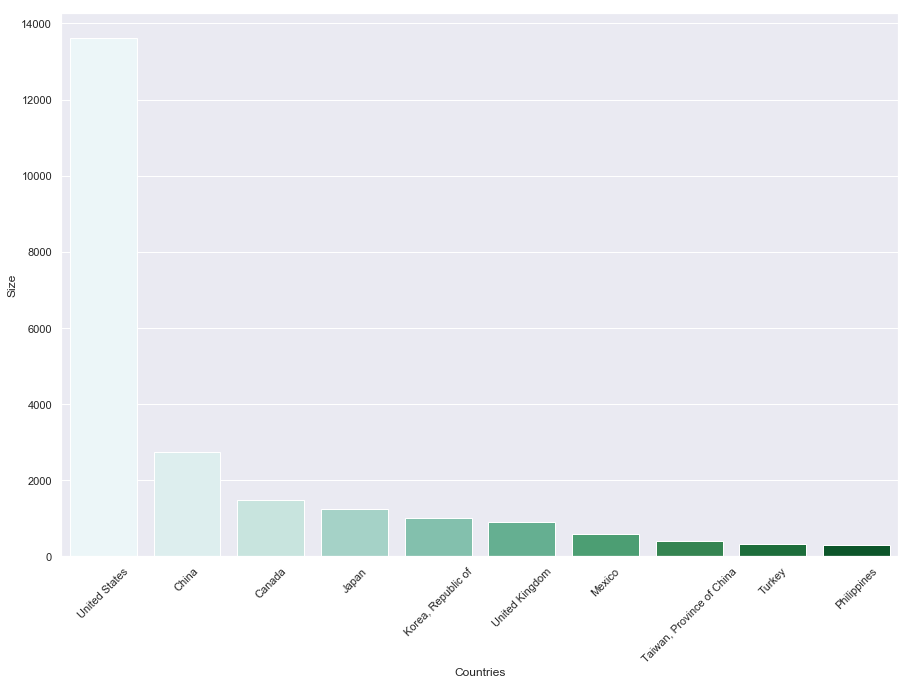

In [313]:
plt.figure(figsize=(15,10))

sns.barplot(x=country_names, y=country_values, palette=sns.color_palette('BuGn', n_colors=10))
plt.xticks(rotation= 45)
plt.xlabel('Countries')
plt.ylabel('Size')

Bariz bir şekilde Amerika Birleşik Devletleri ilk sırada ve onu takip edenler ile arasında büyük bir oran farkı bulunmaktadır.

Ayrıca hangi devletlerin bulunduğunu _WordCloud_ oluşturarak da görselleştirebiliriz.

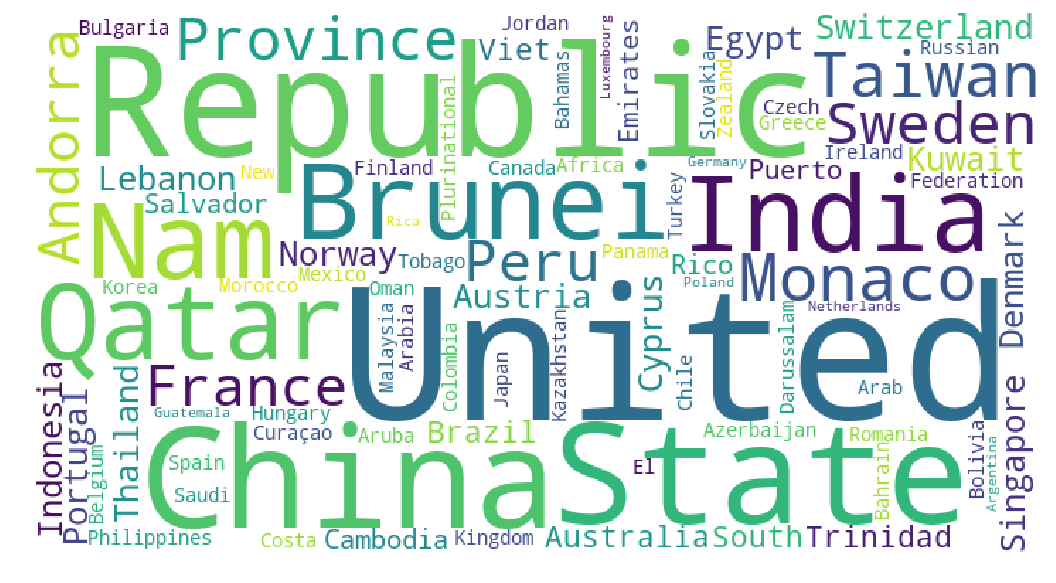

In [275]:
plt.figure(figsize=(20,10))

wordcloud = WordCloud(background_color='white',
                    width=712,
                    height=384)\
            .generate(" ".join(starbucks.country_name.value_counts().index))

plt.imshow(wordcloud)
plt.axis('off');

In [316]:
starbucks.head()

,brand,store_number,store_name,ownership_type,state/province,country,timezone,longitude,latitude,country_indice,country_name
0,Starbucks,47370-257954,"Meritxell, 96",Licensed,7,AD,GMT+1:00 Europe/Andorra,1.53,42.51,0,Andorra
1,Starbucks,22331-212325,Ajman Drive Thru,Licensed,AJ,AE,GMT+04:00 Asia/Dubai,55.47,25.42,1,United Arab Emirates
2,Starbucks,47089-256771,Dana Mall,Licensed,AJ,AE,GMT+04:00 Asia/Dubai,55.47,25.39,1,United Arab Emirates
3,Starbucks,22126-218024,Twofour 54,Licensed,AZ,AE,GMT+04:00 Asia/Dubai,54.38,24.48,1,United Arab Emirates
4,Starbucks,17127-178586,Al Ain Tower,Licensed,AZ,AE,GMT+04:00 Asia/Dubai,54.54,24.51,1,United Arab Emirates


Sahiplik tipi üzerinden Starbucks dağılımlarını inceleyelim.

İlk olarak sahiplik tiplerine göre en çok hangi tip(ler) ağırlık göstermekte bakalım:

Text(0.5,1,'Ownership Types over Startbucks')

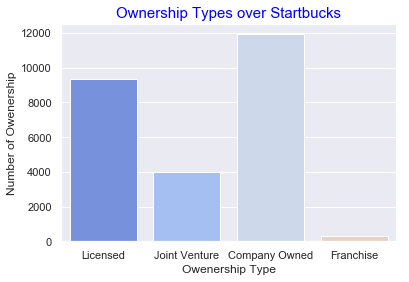

In [323]:
sns.countplot(starbucks.ownership_type, palette=sns.color_palette('coolwarm'))
plt.ylabel('Number of Ownership')
plt.xlabel('Owenership Type')
plt.title('Ownership Types over Startbucks', color = 'blue', fontsize=15);

İlk 10 ülkeye ait sahiplik tip verilerine bakalım:

In [541]:
list_ten_countries = country_names.tolist()

In [542]:
ten_countries = starbucks.query('country_name in @list_ten_countries')

In [543]:
group_country_ownership = ten_countries.groupby(['country_name', 'ownership_type'])['brand'].count().reset_index()
pivot_country_ownership = pd.pivot_table(group_country_ownership, values='brand', index='country_name', columns='ownership_type', fill_value=0)
pivot_country_ownership

ownership_type,Company Owned,Franchise,Joint Venture,Licensed
country_name,,,,
Canada,1097,0,0,371
China,1339,0,1220,175
Japan,101,0,1070,66
"Korea, Republic of",0,0,992,0
Mexico,0,0,0,579
Philippines,0,0,0,298
"Taiwan, Province of China",0,0,394,0
Turkey,0,0,0,326
United Kingdom,347,302,0,252


Bar grafiği üzerinden sahiplik kategorilerinin başlıca 10 ülke üzerindeki dökümüne bakalım:

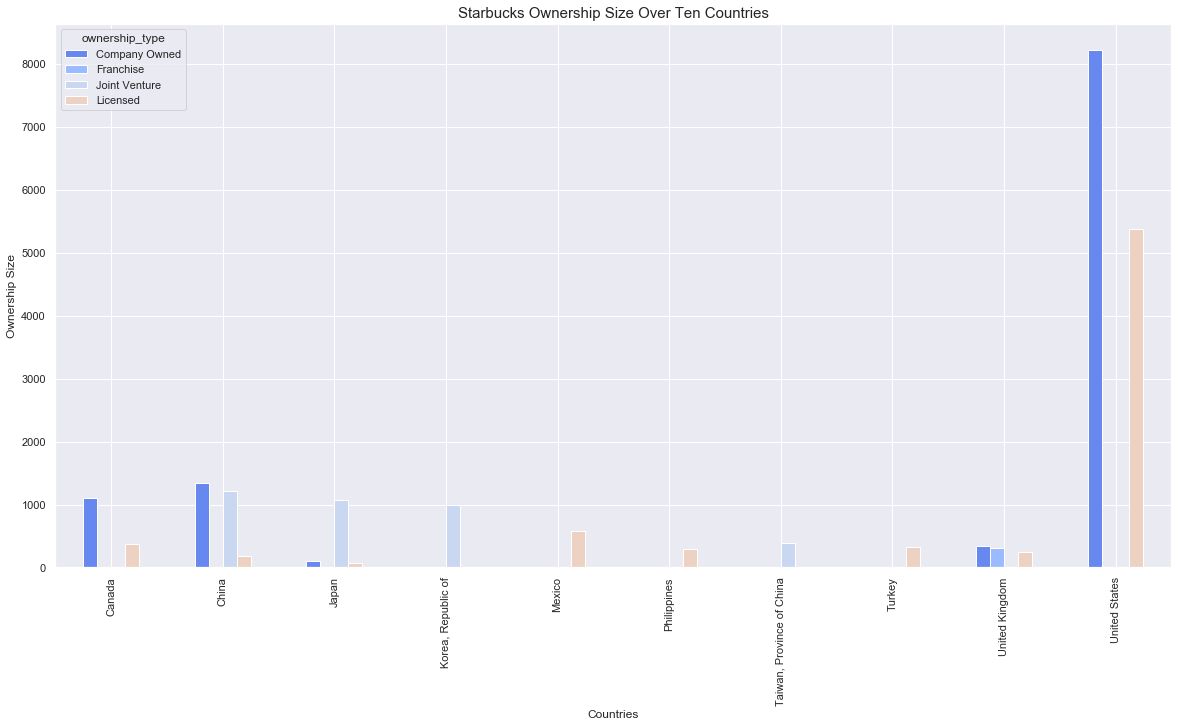

In [519]:
sns.set_palette(sns.color_palette('coolwarm'))
pivot_country_ownership.plot(kind='bar',figsize=(20,10))
plt.xlabel('Countries')
plt.ylabel('Ownership Size')
plt.title('Starbucks Ownership Size Over Ten Countries', fontsize=15);

Sahiplik kategorisinde ortalamaya göre ilk 10 ülkenin değerleri:

In [548]:
sum_ownership_type = pivot_country_ownership.sum(axis=0)
pivot_country_ownership["Company Owned Ratio"] = pivot_country_ownership["Company Owned"] / sum_ownership_type["Company Owned"]
pivot_country_ownership["Franchise Ratio"] = pivot_country_ownership["Franchise"] / sum_ownership_type["Franchise"]
pivot_country_ownership["Joint Venture Ratio"] = pivot_country_ownership["Joint Venture"] / sum_ownership_type["Joint Venture"]
pivot_country_ownership["Licensed Ratio"] = pivot_country_ownership["Licensed"] / sum_ownership_type["Licensed"]

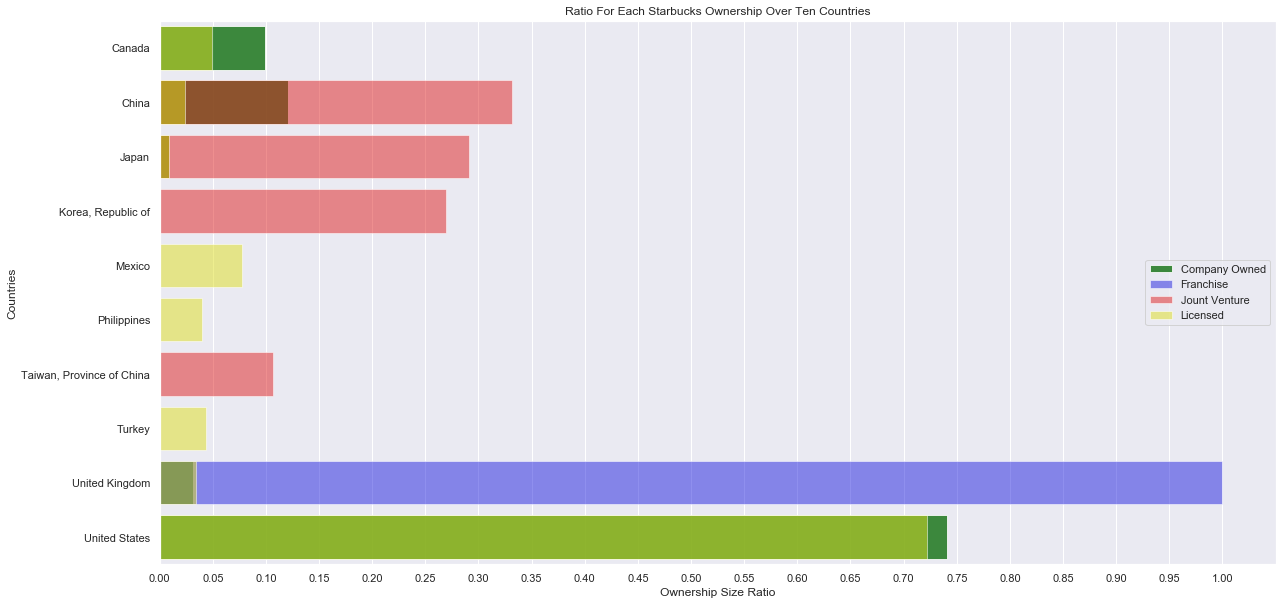

In [558]:
fig, ax = plt.subplots(figsize=(20,10))

sns.barplot(x=pivot_country_ownership["Company Owned Ratio"], y=pivot_country_ownership.index, color='green',alpha = 0.8,label='Company Owned')
sns.barplot(x=pivot_country_ownership["Franchise Ratio"], y=pivot_country_ownership.index, color='blue',alpha = 0.5,label='Franchise')
sns.barplot(x=pivot_country_ownership["Joint Venture Ratio"], y=pivot_country_ownership.index, color='red',alpha = 0.5,label='Jount Venture')
sns.barplot(x=pivot_country_ownership["Licensed Ratio"], y=pivot_country_ownership.index, color='yellow',alpha = 0.5,label='Licensed')

plt.xticks(np.arange(0,1.05,.05))
ax.legend(loc='center right',frameon = True)
ax.set(xlabel='Ownership Size Ratio', ylabel='Countries',title = "Ratio For Each Starbucks Ownership Over Ten Countries");

'Franchise' kategorisinde Starbucks, sadece İngiltere'de düşünülmüş durumda.   

Son olarak, veri kümemiz içerisindeki 'Brand' kolonunu inceleyelim:

In [486]:
starbucks.brand.unique()

array(['Starbucks', 'Teavana', 'Evolution Fresh', 'Coffee House Holdings'], dtype=object)

Starbucks dışında toplam 3 farklı marka gözümüze çarpıyor. Bu markalar biraz incelediğimizde, hepsi Starbucks şirketi tarafından alındığını öğreniyoruz. Bu şirketler sonrasında Starbucks'ın bünyesine dahil olmuşlar.

Son 3 markanın listesini çıkartalım ve sahiplik tiplerine bakalım:

In [489]:
brands = ['Teavana', 'Evolution Fresh', 'Coffee House Holdings']

In [502]:
result = starbucks.query('brand in @brands')
result.shape

(351, 11)

In [499]:
result.ownership_type.unique()

array(['Company Owned'], dtype=object)

In [504]:
result.country_name.unique()

array(['Canada', 'Puerto Rico', 'United States'], dtype=object)

3 şirketin sonrasında Starbucks tarafından alındığını kesinlikle görmüş oluyoruz. Toplamda 3 ülkede 351 tane şubesi mevcutmuş bu markaların. 